In [35]:
import sys

sys.path.insert(0, "/nethome/jsteuer/git/lsv/babylm/")

In [36]:
from matplotlib import pyplot as plt

from constants import config2size, config2size_short, hs2color, nlayers2marker

import matplotlib.lines as mlines
import matplotlib.patches as mpatches



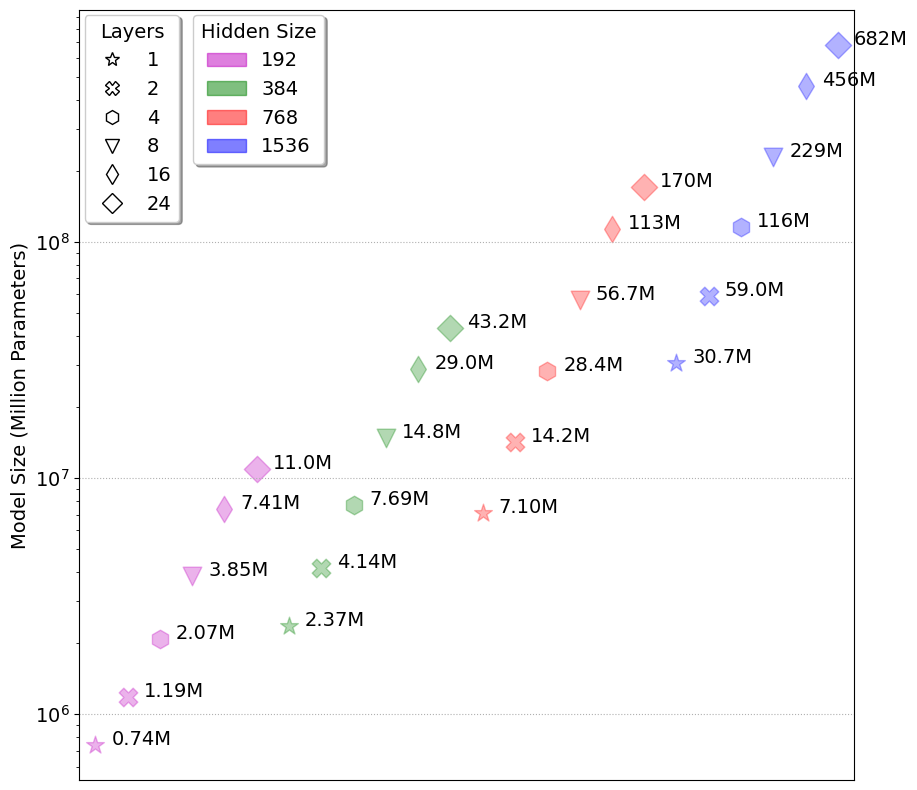

In [62]:
fig_model_sizes, ax = plt.subplots(1,1,figsize=(10, 10))

for x, (config, actual_size) in enumerate(config2size.items()):
    hs, layers = config.split("*")[1], config.split("*")[0]
    size_short = f"{config2size_short[config]}M"
    ax.scatter(x, actual_size, s=180, marker=nlayers2marker[layers], color=hs2color[hs], alpha=0.3)
    ax.text(x+0.5, actual_size, size_short, fontsize=14)

ax.grid(axis="both", linestyle=":")

xs = range(len(config2size))
# ax.set_xticks(xs, labels=config2size.keys(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_xticks([])
ax.set_xlim(-0.5,23.5)

ax.set_yscale("log")
ax.set_ylabel("Model Size (Million Parameters)", fontsize=14)
plt.yticks(fontsize=14)

layerss = [config.split("*")[0] for config in config2size if config.endswith("192")]
hss = [config.split("*")[1] for config in config2size if config.startswith("1*")]

handles = []
for nlayers in layerss:
    handle = mlines.Line2D([], [], marker=nlayers2marker[str(nlayers)], linestyle="None", markersize=10, markerfacecolor="white", label=nlayers, color="black")
    handles.append(handle)

fig_model_sizes.legend(
    handles=handles, bbox_to_anchor=(0.235, 0.885), fontsize=14,       
    loc="upper right", ncol=1, fancybox=True, shadow=True,
    title="Layers", title_fontsize=14
)

handles = []
for hs in hss:
    handle = mpatches.Patch(color=hs2color[str(hs)], label=hs, alpha=0.5)
    handles.append(handle)

fig_model_sizes.legend(
    handles=handles, bbox_to_anchor=(0.38, 0.885), fontsize=14, 
    loc="upper right", ncol=1, fancybox=True, shadow=True,
    title="Hidden Size", title_fontsize=14
)

plt.savefig("../out/img/model_sizes.png", dpi=400)